# <b><font color="blue"> Exploratory Data Analysis of the NYPD Data Set</b></font>
To predict LAW_CAT_CD, also known as OFFENSE_LEVEL

In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## <b>Import Packages

In [226]:
import os

# Load the data using os.path.join
df = pd.read_csv(os.path.join('NYPD_Arrest_Data__Year_to_Date__20241023.csv'))
df

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,281240883,01/28/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,105,0,25-44,M,WHITE,1057545,207911,40.737043,-73.735514,POINT (-73.735514 40.737043)
1,282884120,02/27/2024,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,Q,107,71,45-64,M,WHITE,1037489,206343,40.732881,-73.807899,POINT (-73.807899 40.732881)
2,283137868,03/03/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,48,0,25-44,M,BLACK,1013900,250835,40.855109,-73.892818,POINT (-73.892818 40.855109)
3,287001362,05/16/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200512,F,S,121,0,25-44,M,WHITE,938928,168468,40.628967,-74.163275,POINT (-74.163275 40.628967)
4,287829614,06/02/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,100,0,25-44,M,BLACK,1039777,155013,40.591980,-73.800066,POINT (-73.800066 40.59198)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195442,293968561,09/27/2024,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,Q,109,0,18-24,M,WHITE HISPANIC,1030206,215367,40.757691,-73.834115,POINT (-73.834115 40.757691)
195443,292591949,09/01/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,34,0,25-44,M,WHITE HISPANIC,1004094,251444,40.856808,-73.928265,POINT (-73.92826482905474 40.85680819814297)
195444,294028627,09/29/2024,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402501,F,M,23,0,45-64,M,WHITE,1000141,225685,40.786116,-73.942614,POINT (-73.942614 40.786116)
195445,292933189,09/08/2024,478.0,"THEFT OF SERVICES, UNCLASSIFIE",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,B,44,1,25-44,M,BLACK,1004749,240880,40.827812,-73.925929,POINT (-73.92592932593037 40.82781161940969)


In [227]:
original_shape = df.shape
original_shape

(195447, 19)

## <b>Type Formatting

In [228]:
df.dtypes

ARREST_KEY                    int64
ARREST_DATE                  object
PD_CD                       float64
PD_DESC                      object
KY_CD                       float64
OFNS_DESC                    object
LAW_CODE                     object
LAW_CAT_CD                   object
ARREST_BORO                  object
ARREST_PRECINCT               int64
JURISDICTION_CODE             int64
AGE_GROUP                    object
PERP_SEX                     object
PERP_RACE                    object
X_COORD_CD                    int64
Y_COORD_CD                    int64
Latitude                    float64
Longitude                   float64
New Georeferenced Column     object
dtype: object

In [229]:
# convert the 'ARREST_DATE' column to datetime format
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])

In [230]:
# make sure there aren't duplicate ARREST_KEYs
keys = df['ARREST_KEY'].nunique()
numbers = df.shape[0]
numbers == keys

True

In [231]:
# check if any decimal values in the 'PD_CD' column
for i in df['PD_CD']:
    if i % 1 != 0:
        print(i)
# okay we can safely convert to int or categorical after dropping null values

nan
nan
nan
nan
nan
nan


In [232]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,281240883,2024-01-28,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,105,0,25-44,M,WHITE,1057545,207911,40.737043,-73.735514,POINT (-73.735514 40.737043)
1,282884120,2024-02-27,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,Q,107,71,45-64,M,WHITE,1037489,206343,40.732881,-73.807899,POINT (-73.807899 40.732881)
2,283137868,2024-03-03,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,48,0,25-44,M,BLACK,1013900,250835,40.855109,-73.892818,POINT (-73.892818 40.855109)
3,287001362,2024-05-16,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200512,F,S,121,0,25-44,M,WHITE,938928,168468,40.628967,-74.163275,POINT (-74.163275 40.628967)
4,287829614,2024-06-02,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,100,0,25-44,M,BLACK,1039777,155013,40.591980,-73.800066,POINT (-73.800066 40.59198)


In [233]:
for col in df.columns:
    print(col, ":", df[col].nunique(), ":", df[col].dtype)

ARREST_KEY : 195447 : int64
ARREST_DATE : 274 : datetime64[ns]
PD_CD : 262 : float64
PD_DESC : 252 : object
KY_CD : 69 : float64
OFNS_DESC : 59 : object
LAW_CODE : 1049 : object
LAW_CAT_CD : 6 : object
ARREST_BORO : 5 : object
ARREST_PRECINCT : 77 : int64
JURISDICTION_CODE : 25 : int64
AGE_GROUP : 5 : object
PERP_SEX : 2 : object
PERP_RACE : 7 : object
X_COORD_CD : 27815 : int64
Y_COORD_CD : 29459 : int64
Latitude : 33788 : float64
Longitude : 33815 : float64
New Georeferenced Column : 34621 : object


In [234]:
#rename LAW_CAT_CD to OFFENSE_Level
df.rename(columns={'LAW_CAT_CD':'OFFENSE_LEVEL'}, inplace=True)

## <b>Null Values

In [235]:
df.isnull().sum()

ARREST_KEY                     0
ARREST_DATE                    0
PD_CD                          6
PD_DESC                        0
KY_CD                         26
OFNS_DESC                      0
LAW_CODE                       0
OFFENSE_LEVEL               1109
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
New Georeferenced Column       0
dtype: int64

In [236]:
# We'll just drop the nan since the max NaNs is 1109 (max being sum of all nan which is 1,141) -- which is less than 1% of the data.
# drop Nan values from the dataset
df.dropna(inplace=True)
df.isnull().sum()

ARREST_KEY                  0
ARREST_DATE                 0
PD_CD                       0
PD_DESC                     0
KY_CD                       0
OFNS_DESC                   0
LAW_CODE                    0
OFFENSE_LEVEL               0
ARREST_BORO                 0
ARREST_PRECINCT             0
JURISDICTION_CODE           0
AGE_GROUP                   0
PERP_SEX                    0
PERP_RACE                   0
X_COORD_CD                  0
Y_COORD_CD                  0
Latitude                    0
Longitude                   0
New Georeferenced Column    0
dtype: int64

In [237]:
# convert the 'PD_CD' column to integer format
df['PD_CD'] = df['PD_CD'].astype(int)
df['KY_CD'] = df['KY_CD'].astype(int)

In [238]:
for col in df.columns:
    print(col, ":", df[col].nunique(), ":", df[col].dtype)

# will do season based analysis
# drop PD_DESC
# encode ARREST_BORO
# dropping null values did change the unique values of some columns a lot so might play into factor later

ARREST_KEY : 194312 : int64
ARREST_DATE : 274 : datetime64[ns]
PD_CD : 251 : int64
PD_DESC : 243 : object
KY_CD : 68 : int64
OFNS_DESC : 57 : object
LAW_CODE : 1036 : object
OFFENSE_LEVEL : 5 : object
ARREST_BORO : 5 : object
ARREST_PRECINCT : 77 : int64
JURISDICTION_CODE : 25 : int64
AGE_GROUP : 5 : object
PERP_SEX : 2 : object
PERP_RACE : 7 : object
X_COORD_CD : 27757 : int64
Y_COORD_CD : 29401 : int64
Latitude : 33710 : float64
Longitude : 33740 : float64
New Georeferenced Column : 34537 : object


In [239]:
# get count of 0,1,2 from jurisdiction code
df['JURISDICTION_CODE'].value_counts()
# Jurisdiction responsible for arrest. Jurisdiction codes 0,1,2 represent NYPD
# 0: Patrol
# 1: Transit
# 2: Housing
# codes 3 and more represent non NYPD jurisdictions

JURISDICTION_CODE
0     167801
1      13983
2       7377
3       1629
17      1571
72       427
97       366
73       264
11       221
51       151
87       105
7         94
71        86
14        85
4         60
52        33
88        13
69        10
13         9
16         7
12         7
85         5
79         5
74         2
76         1
Name: count, dtype: int64

In [240]:
sum_012 = int(df['JURISDICTION_CODE'].value_counts().loc[[0,1,2]].sum())
print(sum_012)

ratio = sum_012/df.shape[0]
print(ratio)

# maybe drop non NYPD jurisdiction codes?
# and encode the rest as 0,1,2?

189161
0.9734910865000618


In [241]:
df['LAW_CODE'].value_counts()

LAW_CODE
PL 1200001    20812
PL 1552500    19904
PL 1651503     8118
VTL0511001     6483
PL 215510B     6386
              ...  
VTL1192U4A        1
PL 2406006        1
PL 1902504        1
VTL0375030        1
PL 2404501        1
Name: count, Length: 1036, dtype: int64

In [242]:
# replace space with - in Law Code
df['LAW_CODE'] = df['LAW_CODE'].str.replace(' ', '-')

In [243]:
df['AGE_GROUP'].value_counts()

AGE_GROUP
25-44    112844
45-64     37791
18-24     32979
<18        7243
65+        3455
Name: count, dtype: int64

In [244]:
# drop rows without M, F, V in OFFENSE_LEVEL
df = df[df['OFFENSE_LEVEL'].isin(['M', 'F', 'V'])]
df

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,OFFENSE_LEVEL,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,281240883,2024-01-28,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL-1211200,F,Q,105,0,25-44,M,WHITE,1057545,207911,40.737043,-73.735514,POINT (-73.735514 40.737043)
1,282884120,2024-02-27,263,"ARSON 2,3,4",114,ARSON,PL-1501001,F,Q,107,71,45-64,M,WHITE,1037489,206343,40.732881,-73.807899,POINT (-73.807899 40.732881)
2,283137868,2024-03-03,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL-1200502,F,B,48,0,25-44,M,BLACK,1013900,250835,40.855109,-73.892818,POINT (-73.892818 40.855109)
3,287001362,2024-05-16,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL-1200512,F,S,121,0,25-44,M,WHITE,938928,168468,40.628967,-74.163275,POINT (-74.163275 40.628967)
4,287829614,2024-06-02,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL-1211200,F,Q,100,0,25-44,M,BLACK,1039777,155013,40.591980,-73.800066,POINT (-73.800066 40.59198)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195442,293968561,2024-09-27,339,"LARCENY,PETIT FROM OPEN AREAS,",341,PETIT LARCENY,PL-1552500,M,Q,109,0,18-24,M,WHITE HISPANIC,1030206,215367,40.757691,-73.834115,POINT (-73.834115 40.757691)
195443,292591949,2024-09-01,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL-1200001,M,M,34,0,25-44,M,WHITE HISPANIC,1004094,251444,40.856808,-73.928265,POINT (-73.92826482905474 40.85680819814297)
195444,294028627,2024-09-29,244,"BURGLARY,UNCLASSIFIED,UNKNOWN",107,BURGLARY,PL-1402501,F,M,23,0,45-64,M,WHITE,1000141,225685,40.786116,-73.942614,POINT (-73.942614 40.786116)
195445,292933189,2024-09-08,478,"THEFT OF SERVICES, UNCLASSIFIE",343,OTHER OFFENSES RELATED TO THEFT,PL-1651503,M,B,44,1,25-44,M,BLACK,1004749,240880,40.827812,-73.925929,POINT (-73.92592932593037 40.82781161940969)


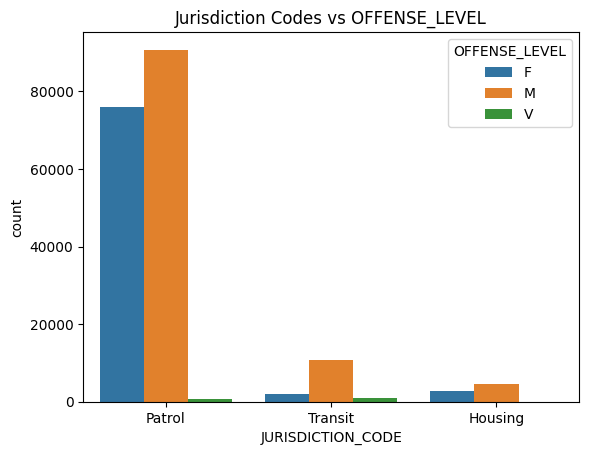

In [245]:
# make a visual of the distribution of OFFENSE_LEVEL across the jurisdiction codes 0,1,2

# select only the rows with jurisdiction codes 0,1,2
df_juris = df[df['JURISDICTION_CODE'].isin([0,1,2])]
sns.countplot(x='JURISDICTION_CODE', data=df_juris, hue='OFFENSE_LEVEL')
plt.title('Jurisdiction Codes vs OFFENSE_LEVEL')
# assign ['Patrol', 'Transit', 'Housing'] to x-axis
plt.xticks(ticks=[0,1,2], labels=['Patrol', 'Transit', 'Housing'])
plt.show()

In [246]:
df['ARREST_BORO'].value_counts()

ARREST_BORO
K    53743
M    45597
B    43613
Q    42350
S     8307
Name: count, dtype: int64

In [247]:
df['OFFENSE_LEVEL'].value_counts()

OFFENSE_LEVEL
M    109326
F     82522
V      1762
Name: count, dtype: int64

In [248]:
(df['OFFENSE_LEVEL'].value_counts()/ df['OFFENSE_LEVEL'].value_counts().sum()) * 100

OFFENSE_LEVEL
M    56.467125
F    42.622798
V     0.910077
Name: count, dtype: float64

In [249]:
# dropped NaN value, dropped rows with OFFENSE_LEVEL not in ['M', 'F', 'V']
print(df.shape)
print(original_shape)

(193610, 19)
(195447, 19)


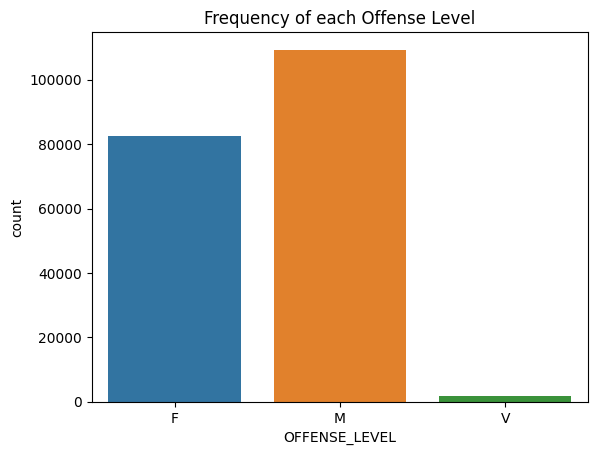

In [250]:
# plot frequency of each offense level
sns.countplot(x='OFFENSE_LEVEL', data=df, hue='OFFENSE_LEVEL')
plt.title('Frequency of each Offense Level')
plt.show()
# color the bars

### <b>Droping columns

In [251]:
df_map = df.copy()
# make a copy of the dataframe for map visualization later

In [252]:
# drop ARREST_KEY, X_COORD_CD, Y_COORD_CD, New Georeferenced Column, PD_DESC, PD_CD
df.drop(columns=['ARREST_KEY', 'X_COORD_CD', 'Y_COORD_CD', 'New Georeferenced Column'], inplace=True)
df

/var/folders/bq/q6bbfq_s68l_m1x6yxgvqnt80000gn/T/ipykernel_34693/93140841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['ARREST_KEY', 'X_COORD_CD', 'Y_COORD_CD', 'New Georeferenced Column'], inplace=True)


,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,OFFENSE_LEVEL,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
0,2024-01-28,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL-1211200,F,Q,105,0,25-44,M,WHITE,40.737043,-73.735514
1,2024-02-27,263,"ARSON 2,3,4",114,ARSON,PL-1501001,F,Q,107,71,45-64,M,WHITE,40.732881,-73.807899
2,2024-03-03,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL-1200502,F,B,48,0,25-44,M,BLACK,40.855109,-73.892818
3,2024-05-16,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL-1200512,F,S,121,0,25-44,M,WHITE,40.628967,-74.163275
4,2024-06-02,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL-1211200,F,Q,100,0,25-44,M,BLACK,40.591980,-73.800066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195442,2024-09-27,339,"LARCENY,PETIT FROM OPEN AREAS,",341,PETIT LARCENY,PL-1552500,M,Q,109,0,18-24,M,WHITE HISPANIC,40.757691,-73.834115
195443,2024-09-01,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL-1200001,M,M,34,0,25-44,M,WHITE HISPANIC,40.856808,-73.928265
195444,2024-09-29,244,"BURGLARY,UNCLASSIFIED,UNKNOWN",107,BURGLARY,PL-1402501,F,M,23,0,45-64,M,WHITE,40.786116,-73.942614
195445,2024-09-08,478,"THEFT OF SERVICES, UNCLASSIFIE",343,OTHER OFFENSES RELATED TO THEFT,PL-1651503,M,B,44,1,25-44,M,BLACK,40.827812,-73.925929


In [253]:
df

,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,OFFENSE_LEVEL,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
0,2024-01-28,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL-1211200,F,Q,105,0,25-44,M,WHITE,40.737043,-73.735514
1,2024-02-27,263,"ARSON 2,3,4",114,ARSON,PL-1501001,F,Q,107,71,45-64,M,WHITE,40.732881,-73.807899
2,2024-03-03,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL-1200502,F,B,48,0,25-44,M,BLACK,40.855109,-73.892818
3,2024-05-16,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL-1200512,F,S,121,0,25-44,M,WHITE,40.628967,-74.163275
4,2024-06-02,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL-1211200,F,Q,100,0,25-44,M,BLACK,40.591980,-73.800066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195442,2024-09-27,339,"LARCENY,PETIT FROM OPEN AREAS,",341,PETIT LARCENY,PL-1552500,M,Q,109,0,18-24,M,WHITE HISPANIC,40.757691,-73.834115
195443,2024-09-01,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL-1200001,M,M,34,0,25-44,M,WHITE HISPANIC,40.856808,-73.928265
195444,2024-09-29,244,"BURGLARY,UNCLASSIFIED,UNKNOWN",107,BURGLARY,PL-1402501,F,M,23,0,45-64,M,WHITE,40.786116,-73.942614
195445,2024-09-08,478,"THEFT OF SERVICES, UNCLASSIFIE",343,OTHER OFFENSES RELATED TO THEFT,PL-1651503,M,B,44,1,25-44,M,BLACK,40.827812,-73.925929


### <b>Heatmap for intial Analysis

## Location heatmap

In [254]:
df_location_heat = df.copy()
# season, borough, Demographics
df_location_heat.drop(columns=['AGE_GROUP','PERP_SEX','PERP_RACE','LAW_CODE'], inplace=True)

In [255]:
df_location_heat

,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,OFFENSE_LEVEL,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,Latitude,Longitude
0,2024-01-28,105,STRANGULATION 1ST,106,FELONY ASSAULT,F,Q,105,0,40.737043,-73.735514
1,2024-02-27,263,"ARSON 2,3,4",114,ARSON,F,Q,107,71,40.732881,-73.807899
2,2024-03-03,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,F,B,48,0,40.855109,-73.892818
3,2024-05-16,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,F,S,121,0,40.628967,-74.163275
4,2024-06-02,105,STRANGULATION 1ST,106,FELONY ASSAULT,F,Q,100,0,40.591980,-73.800066
...,...,...,...,...,...,...,...,...,...,...,...
195442,2024-09-27,339,"LARCENY,PETIT FROM OPEN AREAS,",341,PETIT LARCENY,M,Q,109,0,40.757691,-73.834115
195443,2024-09-01,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,M,M,34,0,40.856808,-73.928265
195444,2024-09-29,244,"BURGLARY,UNCLASSIFIED,UNKNOWN",107,BURGLARY,F,M,23,0,40.786116,-73.942614
195445,2024-09-08,478,"THEFT OF SERVICES, UNCLASSIFIE",343,OTHER OFFENSES RELATED TO THEFT,M,B,44,1,40.827812,-73.925929


In [256]:
# add a column for season and month and drop ARREST_DATE
df_location_heat['MONTH'] = df_location_heat['ARREST_DATE'].dt.month

df_location_heat['SEASON'] = df_location_heat['MONTH'].apply(lambda x: 'Winter' if x in [12,1,2] else 'Spring' if x in [3,4,5] else 'Summer' if x in [6,7,8] else 'Fall')

df_location_heat.drop(columns=['ARREST_DATE'], inplace=True)
# make month and season columns categorical
df_location_heat['MONTH'] = df_location_heat['MONTH'].astype('category')
df_location_heat['SEASON'] = df_location_heat['SEASON'].astype('category')
df_location_heat.drop(columns=['MONTH'], inplace=True)

In [257]:
# covert and encode ARREST_BORO, SEASON, OFFENSE_LEVEL
df_location_heat['ARREST_BORO'] = df_location_heat['ARREST_BORO'].astype('category')
df_location_heat['SEASON'] = df_location_heat['SEASON'].astype('category')
df_location_heat['OFFENSE_LEVEL'] = df_location_heat['OFFENSE_LEVEL'].astype('category')
df_location_heat['PD_DESC'] = df_location_heat['PD_DESC'].astype('category')
df_location_heat['OFNS_DESC'] = df_location_heat['PD_CD'].astype('category')

df_location_heat['ARREST_BORO'] = df_location_heat['ARREST_BORO'].cat.codes
df_location_heat['SEASON'] = df_location_heat['SEASON'].cat.codes
df_location_heat['OFFENSE_LEVEL'] = df_location_heat['OFFENSE_LEVEL'].cat.codes
df_location_heat['PD_DESC'] = df_location_heat['PD_DESC'].cat.codes


In [258]:
df_location_heat

,PD_CD,PD_DESC,KY_CD,OFNS_DESC,OFFENSE_LEVEL,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,Latitude,Longitude,SEASON
0,105,206,106,105,0,3,105,0,40.737043,-73.735514,3
1,263,16,114,263,0,3,107,71,40.732881,-73.807899,3
2,109,17,106,109,0,0,48,0,40.855109,-73.892818,1
3,109,17,106,109,0,4,121,0,40.628967,-74.163275,1
4,105,206,106,105,0,3,100,0,40.591980,-73.800066,2
...,...,...,...,...,...,...,...,...,...,...,...
195442,339,124,341,339,1,3,109,0,40.757691,-73.834115,0
195443,101,18,344,101,1,2,34,0,40.856808,-73.928265,0
195444,244,29,107,244,0,2,23,0,40.786116,-73.942614,0
195445,478,211,343,478,1,0,44,1,40.827812,-73.925929,0


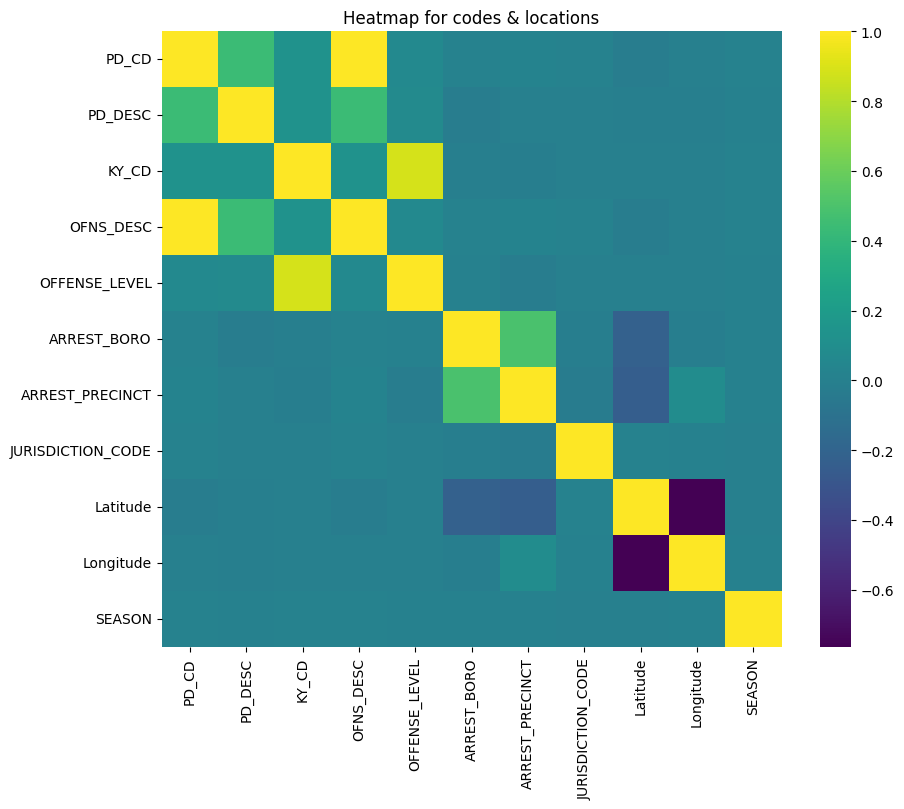

In [259]:
# create a heatmap of the df_location_heat
plt.figure(figsize=(10,8))
sns.heatmap(df_location_heat.corr(), cmap='viridis')
plt.title('Heatmap for codes & locations')
plt.show()

In [260]:
df_demo_heat = df.copy()
df_demo_heat

,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,OFFENSE_LEVEL,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
0,2024-01-28,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL-1211200,F,Q,105,0,25-44,M,WHITE,40.737043,-73.735514
1,2024-02-27,263,"ARSON 2,3,4",114,ARSON,PL-1501001,F,Q,107,71,45-64,M,WHITE,40.732881,-73.807899
2,2024-03-03,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL-1200502,F,B,48,0,25-44,M,BLACK,40.855109,-73.892818
3,2024-05-16,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL-1200512,F,S,121,0,25-44,M,WHITE,40.628967,-74.163275
4,2024-06-02,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL-1211200,F,Q,100,0,25-44,M,BLACK,40.591980,-73.800066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195442,2024-09-27,339,"LARCENY,PETIT FROM OPEN AREAS,",341,PETIT LARCENY,PL-1552500,M,Q,109,0,18-24,M,WHITE HISPANIC,40.757691,-73.834115
195443,2024-09-01,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL-1200001,M,M,34,0,25-44,M,WHITE HISPANIC,40.856808,-73.928265
195444,2024-09-29,244,"BURGLARY,UNCLASSIFIED,UNKNOWN",107,BURGLARY,PL-1402501,F,M,23,0,45-64,M,WHITE,40.786116,-73.942614
195445,2024-09-08,478,"THEFT OF SERVICES, UNCLASSIFIE",343,OTHER OFFENSES RELATED TO THEFT,PL-1651503,M,B,44,1,25-44,M,BLACK,40.827812,-73.925929


In [261]:
df_demo_heat.drop(columns=['ARREST_BORO','LAW_CODE', 'ARREST_DATE', 'JURISDICTION_CODE', 'Latitude','Longitude'], inplace=True)

In [262]:
df_demo_heat


,PD_CD,PD_DESC,KY_CD,OFNS_DESC,OFFENSE_LEVEL,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE
0,105,STRANGULATION 1ST,106,FELONY ASSAULT,F,105,25-44,M,WHITE
1,263,"ARSON 2,3,4",114,ARSON,F,107,45-64,M,WHITE
2,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,F,48,25-44,M,BLACK
3,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,F,121,25-44,M,WHITE
4,105,STRANGULATION 1ST,106,FELONY ASSAULT,F,100,25-44,M,BLACK
...,...,...,...,...,...,...,...,...,...
195442,339,"LARCENY,PETIT FROM OPEN AREAS,",341,PETIT LARCENY,M,109,18-24,M,WHITE HISPANIC
195443,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,M,34,25-44,M,WHITE HISPANIC
195444,244,"BURGLARY,UNCLASSIFIED,UNKNOWN",107,BURGLARY,F,23,45-64,M,WHITE
195445,478,"THEFT OF SERVICES, UNCLASSIFIE",343,OTHER OFFENSES RELATED TO THEFT,M,44,25-44,M,BLACK


In [263]:
# categorize and encode from df_demo_heat
df_demo_heat['AGE_GROUP'] = df_demo_heat['AGE_GROUP'].astype('category')
df_demo_heat['PERP_RACE'] = df_demo_heat['PERP_RACE'].astype('category')
df_demo_heat['PERP_SEX'] = df_demo_heat['PERP_SEX'].astype('category')
df_demo_heat['PD_DESC'] = df_demo_heat['PD_DESC'].astype('category')
df_demo_heat['OFNS_DESC'] = df_demo_heat['OFNS_DESC'].astype('category')
df_demo_heat['OFFENSE_LEVEL'] = df_demo_heat['OFFENSE_LEVEL'].astype('category')

df_demo_heat['AGE_GROUP'] = df_demo_heat['AGE_GROUP'].cat.codes
df_demo_heat['PERP_RACE'] = df_demo_heat['PERP_RACE'].cat.codes
df_demo_heat['PERP_SEX'] = df_demo_heat['PERP_SEX'].cat.codes
df_demo_heat['PD_DESC'] = df_demo_heat['PD_DESC'].cat.codes
df_demo_heat['OFNS_DESC'] = df_demo_heat['OFNS_DESC'].cat.codes
df_demo_heat['OFFENSE_LEVEL'] = df_demo_heat['OFFENSE_LEVEL'].cat.codes

In [264]:
df_demo_heat

,PD_CD,PD_DESC,KY_CD,OFNS_DESC,OFFENSE_LEVEL,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE
0,105,206,106,17,0,105,1,1,5
1,263,16,114,4,0,107,2,1,5
2,109,17,106,17,0,48,1,1,2
3,109,17,106,17,0,121,1,1,5
4,105,206,106,17,0,100,1,1,2
...,...,...,...,...,...,...,...,...,...
195442,339,124,341,47,1,109,0,1,6
195443,101,18,344,5,1,34,1,1,6
195444,244,29,107,7,0,23,2,1,5
195445,478,211,343,43,1,44,1,1,2


Text(0.5, 1.0, 'Heatmap for Demographics')

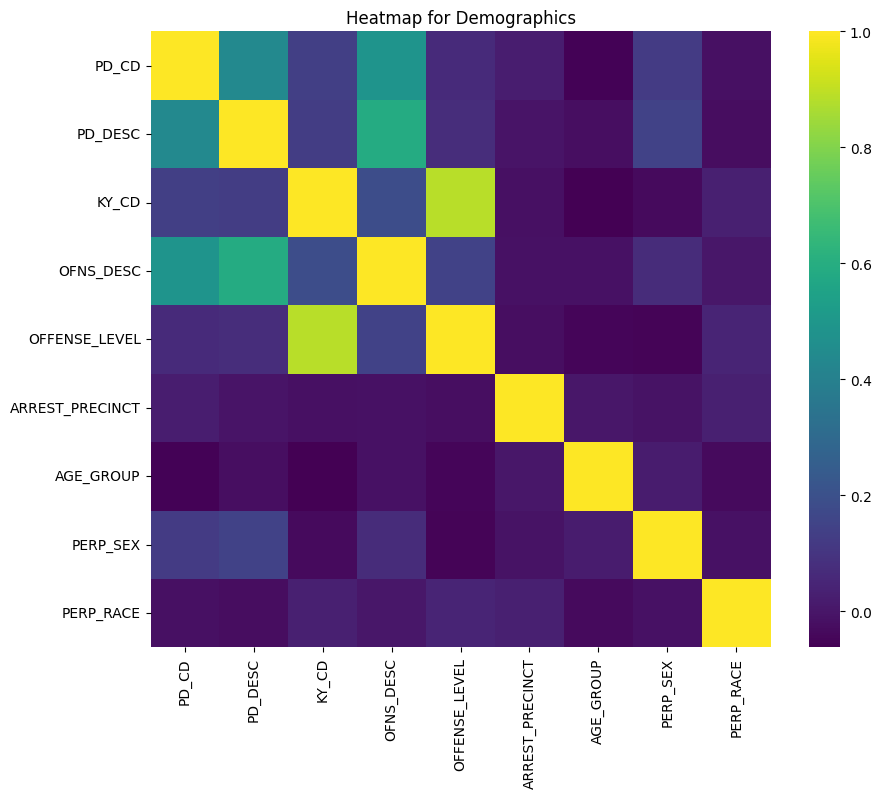

In [265]:
# make a heatmap of df_demo_heat
plt.figure(figsize=(10,8))
sns.heatmap(df_demo_heat.corr(), cmap='viridis')
plt.title('Heatmap for Demographics')

## <b> <font color="blue"> Encoding

In [266]:
df_timeseries = df.copy()

In [267]:
# convert ARREST_DATE to month column
df_timeseries['MONTH'] = df_timeseries['ARREST_DATE'].dt.month
df_timeseries.drop(columns=['ARREST_DATE'], inplace=True)

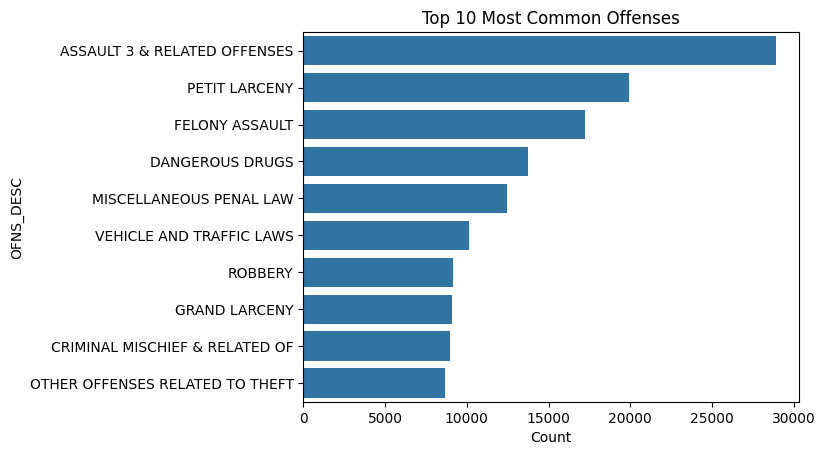

In [268]:
# Get the top 5 most common OFNS_DESC values
top_10_ofns_desc = df['OFNS_DESC'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 5 most common OFNS_DESC values
df_top_10 = df[df['OFNS_DESC'].isin(top_10_ofns_desc)]

# Plot the count of each of the top 5 most common OFNS_DESC values
sns.countplot(y='OFNS_DESC', data=df_top_10, order=top_10_ofns_desc)

plt.title('Top 10 Most Common Offenses')
plt.xlabel('Count')
plt.ylabel('OFNS_DESC')
plt.show()

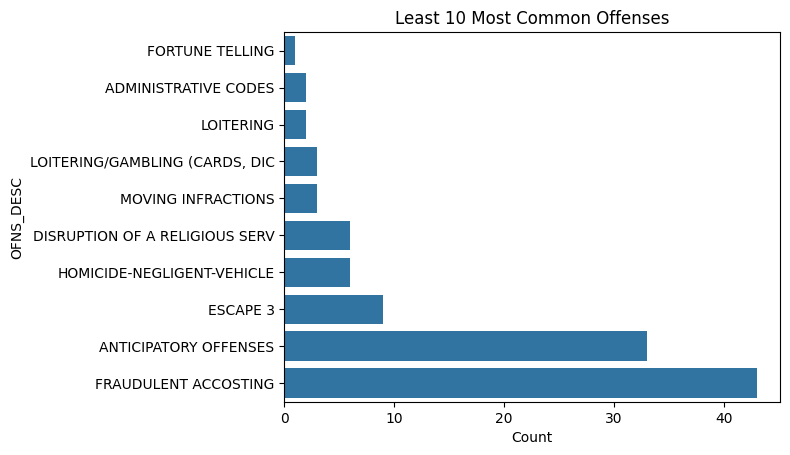

In [269]:
# Get the least 10 common OFNS_DESC values
least_10_ofns_desc = df['OFNS_DESC'].value_counts().nsmallest(10).index

# Filter the DataFrame to include only the least 10 common OFNS_DESC values
df_least_10 = df[df['OFNS_DESC'].isin(least_10_ofns_desc)]

# Plot the count of each of the least 10 common OFNS_DESC values
sns.countplot(y='OFNS_DESC', data=df_least_10, order=least_10_ofns_desc)

plt.title('Least 10 Most Common Offenses')
plt.xlabel('Count')
plt.ylabel('OFNS_DESC')
plt.show()

In [270]:
df['OFNS_DESC'].value_counts().nlargest(5).index
df_top_5 = df_timeseries[df_timeseries['OFNS_DESC'].isin(df['OFNS_DESC'].value_counts().nlargest(5).index)]

In [271]:
df_top_5

,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,OFFENSE_LEVEL,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,MONTH
0,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL-1211200,F,Q,105,0,25-44,M,WHITE,40.737043,-73.735514,1
2,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL-1200502,F,B,48,0,25-44,M,BLACK,40.855109,-73.892818,3
3,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL-1200512,F,S,121,0,25-44,M,WHITE,40.628967,-74.163275,5
4,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL-1211200,F,Q,100,0,25-44,M,BLACK,40.591980,-73.800066,6
7,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL-1211200,F,K,70,0,25-44,M,BLACK,40.639436,-73.965983,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195439,503,"CONTROLLED SUBSTANCE,INTENT TO",117,DANGEROUS DRUGS,PL-2201601,F,K,60,0,25-44,M,BLACK,40.578358,-73.990504,9
195440,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL-1200001,M,S,123,0,25-44,M,WHITE,40.531398,-74.201501,8
195441,511,"CONTROLLED SUBSTANCE, POSSESSI",235,DANGEROUS DRUGS,PL-2200300,M,K,75,0,45-64,M,BLACK,40.661385,-73.884098,9
195442,339,"LARCENY,PETIT FROM OPEN AREAS,",341,PETIT LARCENY,PL-1552500,M,Q,109,0,18-24,M,WHITE HISPANIC,40.757691,-73.834115,9


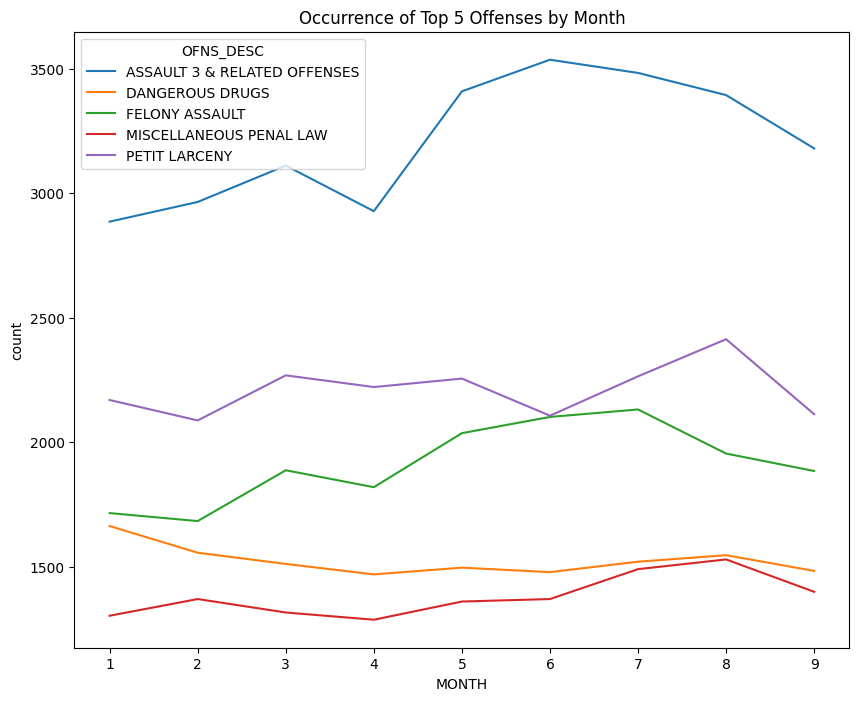

In [272]:
Offenses = ['ASSAULT 3 & RELATED OFFENSES','PETIT LARCENY','FELONY ASSAULT','DANGEROUS DRUGS','MISCELLANEOUS PENAL LAW']
plt.figure(figsize=(10,8))

# Create a line plot
sns.lineplot(x='MONTH', y='count', hue='OFNS_DESC', data=df_top_5.groupby(['MONTH', 'OFNS_DESC']).size().reset_index(name='count'))

# replace the legend with the Offenses list
plt.title('Occurrence of Top 5 Offenses by Month')
plt.show()

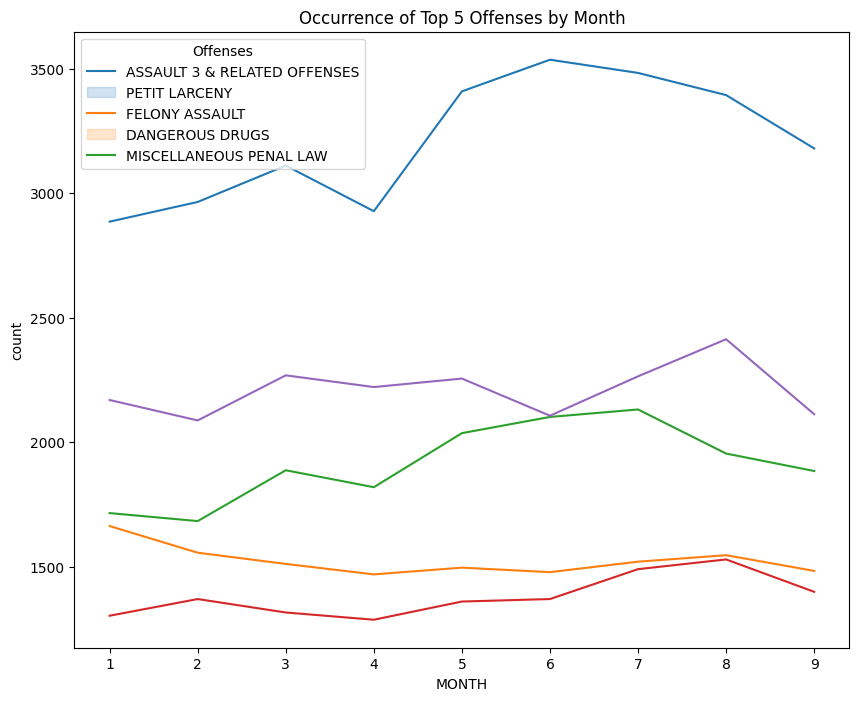

In [273]:
Offenses = ['ASSAULT 3 & RELATED OFFENSES', 'PETIT LARCENY', 'FELONY ASSAULT', 'DANGEROUS DRUGS', 'MISCELLANEOUS PENAL LAW']
plt.figure(figsize=(10,8))

# Create a line plot
sns.lineplot(x='MONTH', y='count', hue='OFNS_DESC', data=df_top_5.groupby(['MONTH', 'OFNS_DESC']).size().reset_index(name='count'))

# Replace the legend with the Offenses list
plt.legend(title='Offenses', labels=Offenses)

plt.title('Occurrence of Top 5 Offenses by Month')
plt.show()

In [274]:
df['OFFENSE_LEVEL'] = df['OFFENSE_LEVEL'].astype('category')
df['PD_DESC'] = df['PD_DESC'].astype('category')
df['OFNS_DESC'] = df['OFNS_DESC'].astype('category')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['PD_DESC'] = le.fit_transform(df['PD_DESC'])
df['OFNS_DESC'] = le.fit_transform(df['OFNS_DESC'])
df['OFFENSE_LEVEL'] = le.fit_transform(df['OFFENSE_LEVEL'])

/var/folders/bq/q6bbfq_s68l_m1x6yxgvqnt80000gn/T/ipykernel_34693/1970364288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OFFENSE_LEVEL'] = df['OFFENSE_LEVEL'].astype('category')
/var/folders/bq/q6bbfq_s68l_m1x6yxgvqnt80000gn/T/ipykernel_34693/1970364288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PD_DESC'] = df['PD_DESC'].astype('category')
/var/folders/bq/q6bbfq_s68l_m1x6yxgvqnt80000gn/T/ipykernel_34693/1970364288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [275]:
df_heat = df.copy()
df_heat.drop(columns=['ARREST_DATE','LAW_CODE','ARREST_BORO','AGE_GROUP','PERP_RACE','PERP_SEX'], inplace=True)

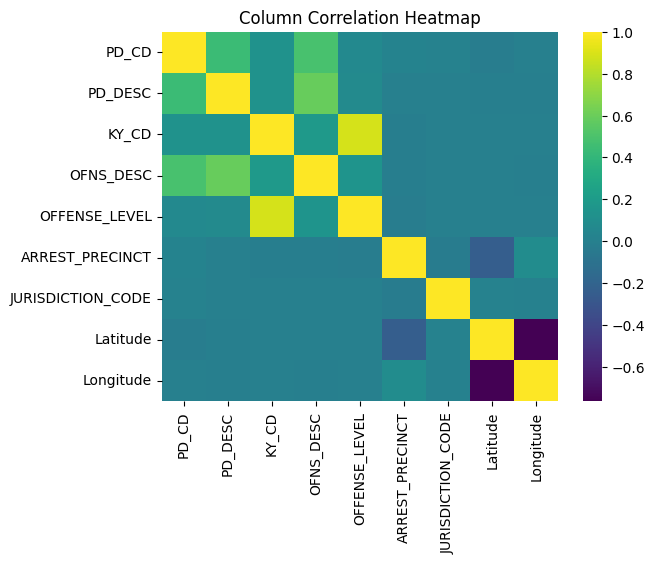

In [276]:
# create a heatmap with spectral color map

sns.heatmap(df_heat.corr(), annot=False, cmap='viridis')
plt.title('Column Correlation Heatmap')
plt.show()

### <b> One hot encoding and extra DFs

In [277]:
# add a column for season and month and drop ARREST_DATE
df['MONTH'] = df['ARREST_DATE'].dt.month

df['SEASON'] = df['MONTH'].apply(lambda x: 'Winter' if x in [12,1,2] else 'Spring' if x in [3,4,5] else 'Summer' if x in [6,7,8] else 'Fall')

df.drop(columns=['ARREST_DATE'], inplace=True)
# make month and season columns categorical
df['MONTH'] = df['MONTH'].astype('category')
df['SEASON'] = df['SEASON'].astype('category')

/var/folders/bq/q6bbfq_s68l_m1x6yxgvqnt80000gn/T/ipykernel_34693/3740503108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MONTH'] = df['ARREST_DATE'].dt.month
/var/folders/bq/q6bbfq_s68l_m1x6yxgvqnt80000gn/T/ipykernel_34693/3740503108.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SEASON'] = df['MONTH'].apply(lambda x: 'Winter' if x in [12,1,2] else 'Spring' if x in [3,4,5] else 'Summer' if x in [6,7,8] else 'Fall')
/var/folders/bq/q6bbfq_s68l_m1x6yxgvqnt80000gn/T/ipykernel_34693/37405031

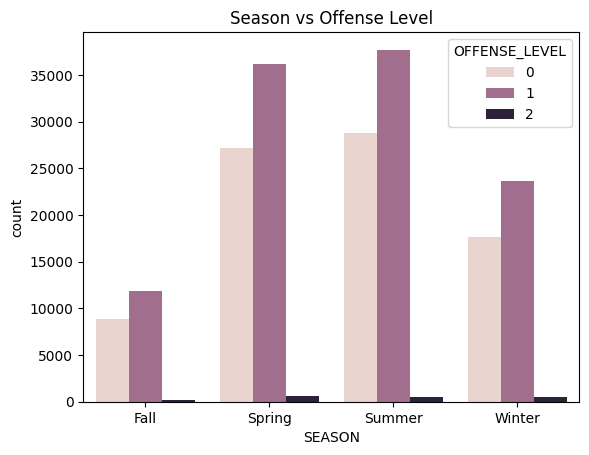

In [278]:
# vizualize the gender distribution
sns.countplot(x='SEASON', data=df, hue='OFFENSE_LEVEL')
plt.title('Season vs Offense Level')
plt.show()

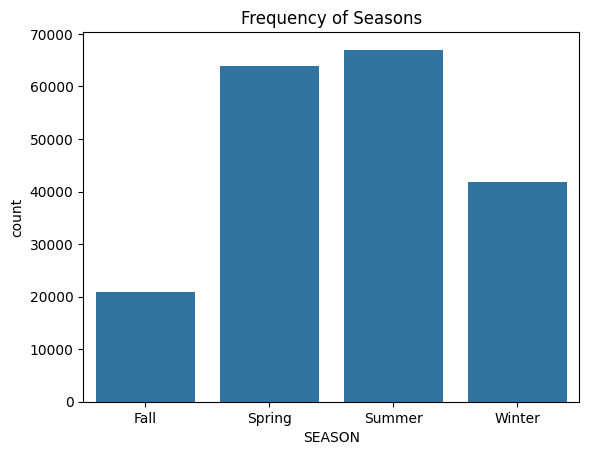

In [279]:
# plot frequency of seasons
sns.countplot(x='SEASON', data=df)
plt.title('Frequency of Seasons')
plt.show()

In [280]:
# one hot encode season
df = pd.get_dummies(df, columns=['SEASON'])
df.rename(columns={
    'SEASON_Winter': 'WINTER',
    'SEASON_Spring': 'SPRING',
    'SEASON_Summer': 'SUMMER',
    'SEASON_Fall': 'FALL'
}, inplace=True)

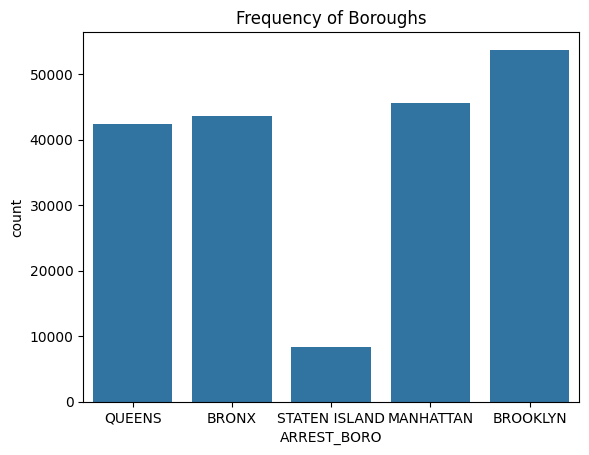

In [281]:
# plot frequency of borough
sns.countplot(x='ARREST_BORO', data=df)
plt.title('Frequency of Boroughs')
boro = ['QUEENS','BRONX','STATEN ISLAND', 'MANHATTAN', 'BROOKLYN']
plt.xticks(ticks=[0,1,2,3,4], labels=boro)
plt.show()

([<matplotlib.axis.XTick at 0x33a8ad310>,
 [Text(0, 0, 'QUEENS'),
  Text(1, 0, 'BRONX'),
  Text(2, 0, 'STATEN ISLAND'),
  Text(3, 0, 'MANHATTAN'),
  Text(4, 0, 'BROOKLYN')])

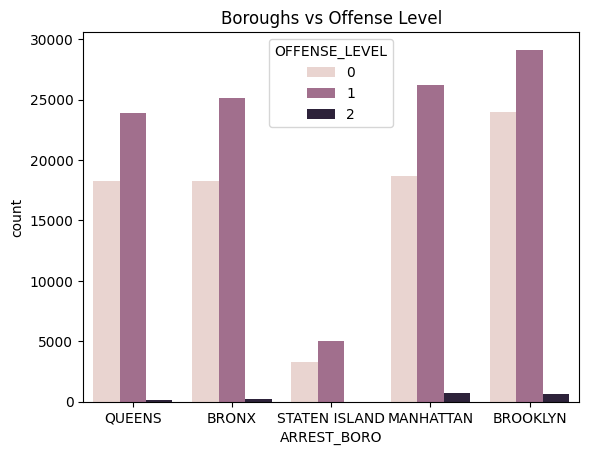

In [282]:
# ofense level distribution across boroughs
sns.countplot(x='ARREST_BORO', data=df, hue='OFFENSE_LEVEL')
plt.title('Boroughs vs Offense Level')
plt.xticks(ticks=[0,1,2,3,4], labels=boro)

In [283]:
# one hot encode ARREST_BORO
df = pd.get_dummies(df, columns=['ARREST_BORO'])

# rename columns
df.rename(columns={
    'ARREST_BORO_B': 'BRONX',
    'ARREST_BORO_K': 'BROOKLYN',
    'ARREST_BORO_M': 'MANHATTAN',
    'ARREST_BORO_Q': 'QUEENS',
    'ARREST_BORO_S': 'STATEN_ISLAND'
}, inplace=True)

df

,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,OFFENSE_LEVEL,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,...,MONTH,FALL,SPRING,SUMMER,WINTER,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN_ISLAND
0,105,206,106,17,PL-1211200,0,105,0,25-44,M,...,1,False,False,False,True,False,False,False,True,False
1,263,16,114,4,PL-1501001,0,107,71,45-64,M,...,2,False,False,False,True,False,False,False,True,False
2,109,17,106,17,PL-1200502,0,48,0,25-44,M,...,3,False,True,False,False,True,False,False,False,False
3,109,17,106,17,PL-1200512,0,121,0,25-44,M,...,5,False,True,False,False,False,False,False,False,True
4,105,206,106,17,PL-1211200,0,100,0,25-44,M,...,6,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195442,339,124,341,47,PL-1552500,1,109,0,18-24,M,...,9,True,False,False,False,False,False,False,True,False
195443,101,18,344,5,PL-1200001,1,34,0,25-44,M,...,9,True,False,False,False,False,False,True,False,False
195444,244,29,107,7,PL-1402501,0,23,0,45-64,M,...,9,True,False,False,False,False,False,True,False,False
195445,478,211,343,43,PL-1651503,1,44,1,25-44,M,...,9,True,False,False,False,True,False,False,False,False


In [284]:
# convert KY_CD to categorical type
df['KY_CD'] = df['KY_CD'].astype('category')
df['PD_CD'] = df['PD_CD'].astype('category')

In [285]:
df

,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,OFFENSE_LEVEL,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,...,MONTH,FALL,SPRING,SUMMER,WINTER,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN_ISLAND
0,105,206,106,17,PL-1211200,0,105,0,25-44,M,...,1,False,False,False,True,False,False,False,True,False
1,263,16,114,4,PL-1501001,0,107,71,45-64,M,...,2,False,False,False,True,False,False,False,True,False
2,109,17,106,17,PL-1200502,0,48,0,25-44,M,...,3,False,True,False,False,True,False,False,False,False
3,109,17,106,17,PL-1200512,0,121,0,25-44,M,...,5,False,True,False,False,False,False,False,False,True
4,105,206,106,17,PL-1211200,0,100,0,25-44,M,...,6,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195442,339,124,341,47,PL-1552500,1,109,0,18-24,M,...,9,True,False,False,False,False,False,False,True,False
195443,101,18,344,5,PL-1200001,1,34,0,25-44,M,...,9,True,False,False,False,False,False,True,False,False
195444,244,29,107,7,PL-1402501,0,23,0,45-64,M,...,9,True,False,False,False,False,False,True,False,False
195445,478,211,343,43,PL-1651503,1,44,1,25-44,M,...,9,True,False,False,False,True,False,False,False,False


In [286]:
df.drop(columns=['LAW_CODE'], inplace=True)
# make two datasets, one with demographic data and one without
df_demo = df.copy()
# map the age groups to numerical values

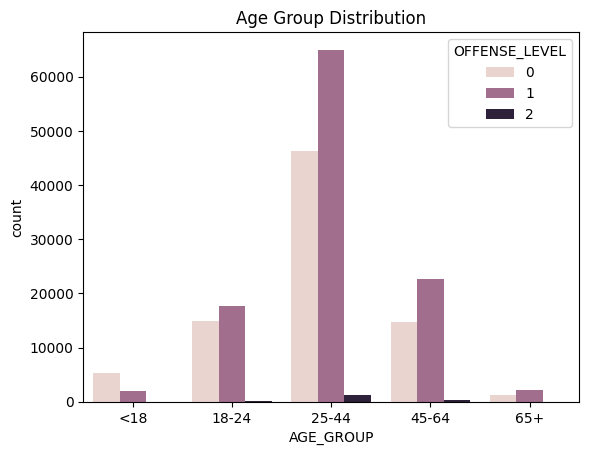

In [287]:
ages_ordered = ['<18', '18-24', '25-44', '45-64', '65+']
# vizualize the age group distribution
sns.countplot(x='AGE_GROUP', data=df_demo, hue='OFFENSE_LEVEL',order=ages_ordered)
plt.title('Age Group Distribution')
plt.show()

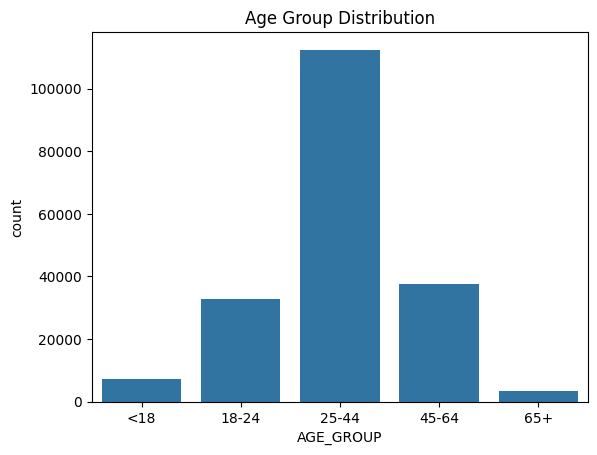

In [288]:
# plot how many of each age group was arrested
sns.countplot(x='AGE_GROUP', data=df_demo, order=ages_ordered)
# order the data by the ages_ordered list
plt.title('Age Group Distribution')
plt.show()

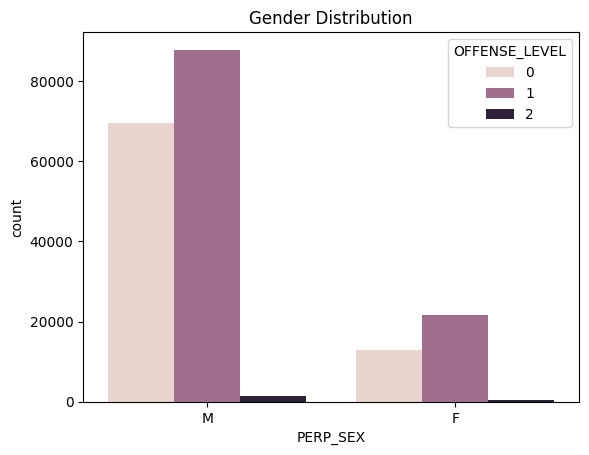

In [289]:
# vizualize the gender distribution
sns.countplot(x='PERP_SEX', data=df_demo, hue='OFFENSE_LEVEL')
plt.title('Gender Distribution')
plt.show()

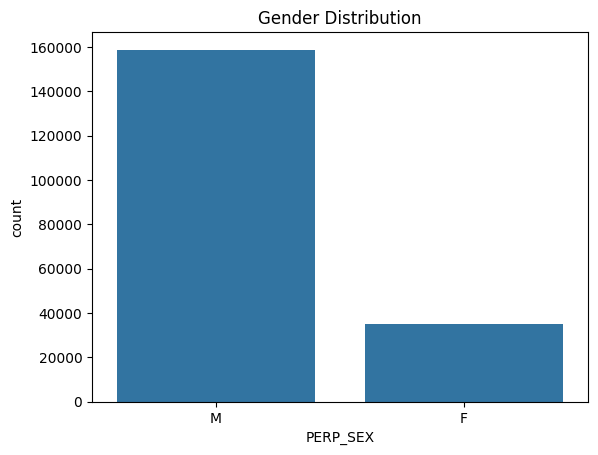

In [290]:
# plot how many of each sex group was arrested
sns.countplot(x='PERP_SEX', data=df_demo)
plt.title('Gender Distribution')
plt.show()

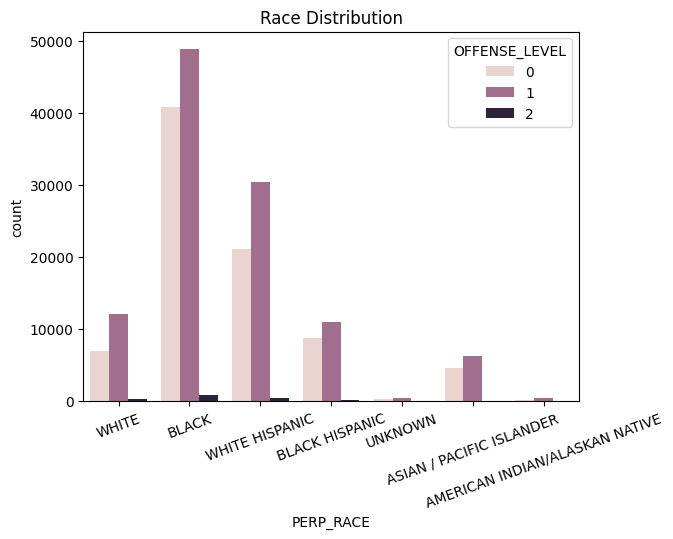

In [291]:
# vizualize the Race distribution
sns.countplot(x='PERP_RACE', data=df_demo, hue='OFFENSE_LEVEL')
# rotate the x-axis labels
plt.xticks(rotation=20)
plt.title('Race Distribution')
plt.show()

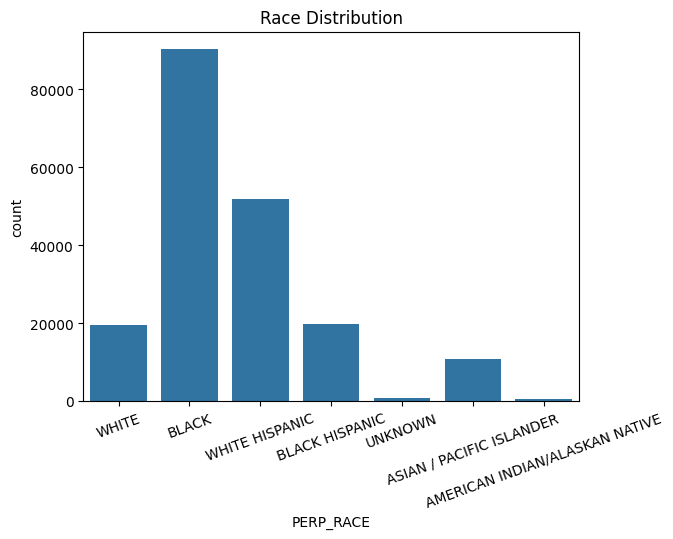

In [292]:
# plot how many of each race group was arrested
sns.countplot(x='PERP_RACE', data=df_demo)
plt.xticks(rotation=20)
plt.title('Race Distribution')
plt.show()

In [293]:
# one hot encode Age, sex, race
df_demo = pd.get_dummies(df_demo, columns=['AGE_GROUP', 'PERP_SEX', 'PERP_RACE'])
df_demo

,PD_CD,PD_DESC,KY_CD,OFNS_DESC,OFFENSE_LEVEL,ARREST_PRECINCT,JURISDICTION_CODE,Latitude,Longitude,MONTH,...,AGE_GROUP_<18,PERP_SEX_F,PERP_SEX_M,PERP_RACE_AMERICAN INDIAN/ALASKAN NATIVE,PERP_RACE_ASIAN / PACIFIC ISLANDER,PERP_RACE_BLACK,PERP_RACE_BLACK HISPANIC,PERP_RACE_UNKNOWN,PERP_RACE_WHITE,PERP_RACE_WHITE HISPANIC
0,105,206,106,17,0,105,0,40.737043,-73.735514,1,...,False,False,True,False,False,False,False,False,True,False
1,263,16,114,4,0,107,71,40.732881,-73.807899,2,...,False,False,True,False,False,False,False,False,True,False
2,109,17,106,17,0,48,0,40.855109,-73.892818,3,...,False,False,True,False,False,True,False,False,False,False
3,109,17,106,17,0,121,0,40.628967,-74.163275,5,...,False,False,True,False,False,False,False,False,True,False
4,105,206,106,17,0,100,0,40.591980,-73.800066,6,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195442,339,124,341,47,1,109,0,40.757691,-73.834115,9,...,False,False,True,False,False,False,False,False,False,True
195443,101,18,344,5,1,34,0,40.856808,-73.928265,9,...,False,False,True,False,False,False,False,False,False,True
195444,244,29,107,7,0,23,0,40.786116,-73.942614,9,...,False,False,True,False,False,False,False,False,True,False
195445,478,211,343,43,1,44,1,40.827812,-73.925929,9,...,False,False,True,False,False,True,False,False,False,False


In [294]:
df.dtypes

PD_CD                category
PD_DESC                 int64
KY_CD                category
OFNS_DESC               int64
OFFENSE_LEVEL           int64
ARREST_PRECINCT         int64
JURISDICTION_CODE       int64
AGE_GROUP              object
PERP_SEX               object
PERP_RACE              object
Latitude              float64
Longitude             float64
MONTH                category
FALL                     bool
SPRING                   bool
SUMMER                   bool
WINTER                   bool
BRONX                    bool
BROOKLYN                 bool
MANHATTAN                bool
QUEENS                   bool
STATEN_ISLAND            bool
dtype: object

In [295]:
df.drop(columns=['AGE_GROUP', 'PERP_SEX','PERP_RACE'], inplace=True)
df

,PD_CD,PD_DESC,KY_CD,OFNS_DESC,OFFENSE_LEVEL,ARREST_PRECINCT,JURISDICTION_CODE,Latitude,Longitude,MONTH,FALL,SPRING,SUMMER,WINTER,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN_ISLAND
0,105,206,106,17,0,105,0,40.737043,-73.735514,1,False,False,False,True,False,False,False,True,False
1,263,16,114,4,0,107,71,40.732881,-73.807899,2,False,False,False,True,False,False,False,True,False
2,109,17,106,17,0,48,0,40.855109,-73.892818,3,False,True,False,False,True,False,False,False,False
3,109,17,106,17,0,121,0,40.628967,-74.163275,5,False,True,False,False,False,False,False,False,True
4,105,206,106,17,0,100,0,40.591980,-73.800066,6,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195442,339,124,341,47,1,109,0,40.757691,-73.834115,9,True,False,False,False,False,False,False,True,False
195443,101,18,344,5,1,34,0,40.856808,-73.928265,9,True,False,False,False,False,False,True,False,False
195444,244,29,107,7,0,23,0,40.786116,-73.942614,9,True,False,False,False,False,False,True,False,False
195445,478,211,343,43,1,44,1,40.827812,-73.925929,9,True,False,False,False,True,False,False,False,False


In [296]:
df_demo

,PD_CD,PD_DESC,KY_CD,OFNS_DESC,OFFENSE_LEVEL,ARREST_PRECINCT,JURISDICTION_CODE,Latitude,Longitude,MONTH,...,AGE_GROUP_<18,PERP_SEX_F,PERP_SEX_M,PERP_RACE_AMERICAN INDIAN/ALASKAN NATIVE,PERP_RACE_ASIAN / PACIFIC ISLANDER,PERP_RACE_BLACK,PERP_RACE_BLACK HISPANIC,PERP_RACE_UNKNOWN,PERP_RACE_WHITE,PERP_RACE_WHITE HISPANIC
0,105,206,106,17,0,105,0,40.737043,-73.735514,1,...,False,False,True,False,False,False,False,False,True,False
1,263,16,114,4,0,107,71,40.732881,-73.807899,2,...,False,False,True,False,False,False,False,False,True,False
2,109,17,106,17,0,48,0,40.855109,-73.892818,3,...,False,False,True,False,False,True,False,False,False,False
3,109,17,106,17,0,121,0,40.628967,-74.163275,5,...,False,False,True,False,False,False,False,False,True,False
4,105,206,106,17,0,100,0,40.591980,-73.800066,6,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195442,339,124,341,47,1,109,0,40.757691,-73.834115,9,...,False,False,True,False,False,False,False,False,False,True
195443,101,18,344,5,1,34,0,40.856808,-73.928265,9,...,False,False,True,False,False,False,False,False,False,True
195444,244,29,107,7,0,23,0,40.786116,-73.942614,9,...,False,False,True,False,False,False,False,False,True,False
195445,478,211,343,43,1,44,1,40.827812,-73.925929,9,...,False,False,True,False,False,True,False,False,False,False


Text(0.5, 1.0, 'Column Correlation Heatmap')

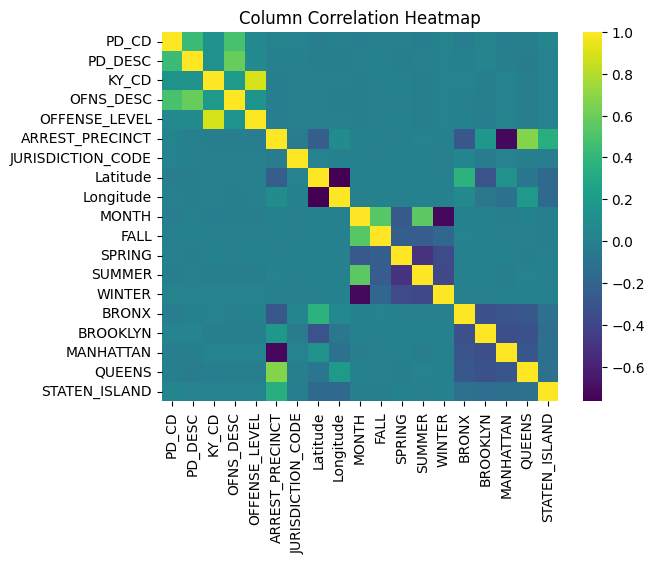

In [297]:
# make a heatmap for df
sns.heatmap(df.corr(), annot=False, cmap='viridis')
plt.title('Column Correlation Heatmap')

Text(0.5, 1.0, 'Demographic Correlation Heatmap')

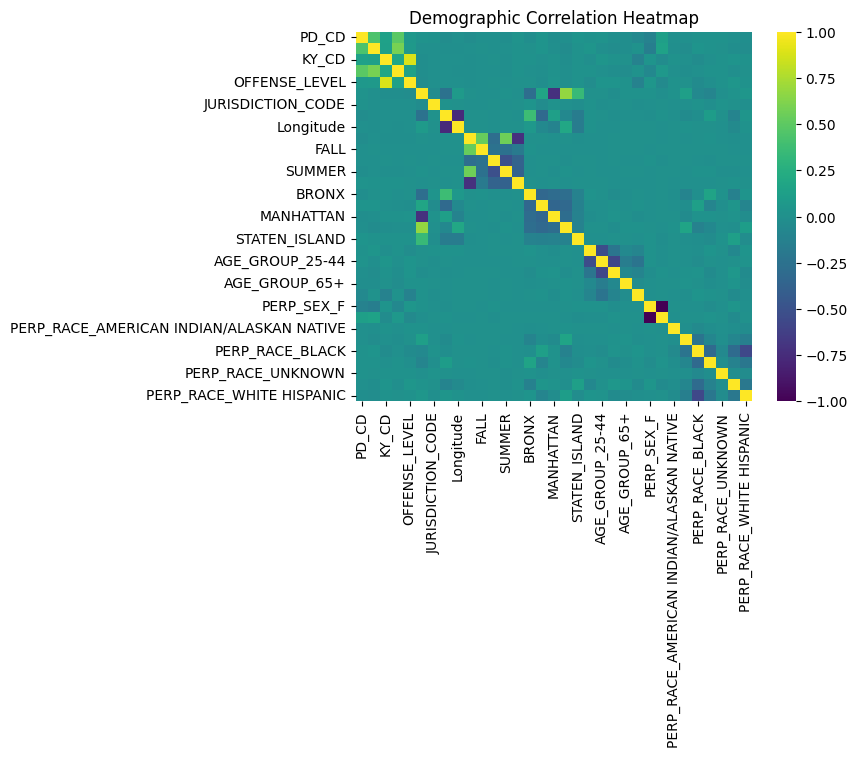

In [298]:
# make a heatmap for df_demo
sns.heatmap(df_demo.corr(), annot=False, cmap='viridis')
plt.title('Demographic Correlation Heatmap')

In [299]:
df_demo_heat = df_demo.drop(columns=['Longitude', 'Latitude','FALL','SPRING','SUMMER','WINTER','MONTH','MANHATTAN','BRONX','BROOKLYN','QUEENS','STATEN_ISLAND'])

In [300]:
df_demo_heat

,PD_CD,PD_DESC,KY_CD,OFNS_DESC,OFFENSE_LEVEL,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP_18-24,AGE_GROUP_25-44,AGE_GROUP_45-64,...,AGE_GROUP_<18,PERP_SEX_F,PERP_SEX_M,PERP_RACE_AMERICAN INDIAN/ALASKAN NATIVE,PERP_RACE_ASIAN / PACIFIC ISLANDER,PERP_RACE_BLACK,PERP_RACE_BLACK HISPANIC,PERP_RACE_UNKNOWN,PERP_RACE_WHITE,PERP_RACE_WHITE HISPANIC
0,105,206,106,17,0,105,0,False,True,False,...,False,False,True,False,False,False,False,False,True,False
1,263,16,114,4,0,107,71,False,False,True,...,False,False,True,False,False,False,False,False,True,False
2,109,17,106,17,0,48,0,False,True,False,...,False,False,True,False,False,True,False,False,False,False
3,109,17,106,17,0,121,0,False,True,False,...,False,False,True,False,False,False,False,False,True,False
4,105,206,106,17,0,100,0,False,True,False,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195442,339,124,341,47,1,109,0,True,False,False,...,False,False,True,False,False,False,False,False,False,True
195443,101,18,344,5,1,34,0,False,True,False,...,False,False,True,False,False,False,False,False,False,True
195444,244,29,107,7,0,23,0,False,False,True,...,False,False,True,False,False,False,False,False,True,False
195445,478,211,343,43,1,44,1,False,True,False,...,False,False,True,False,False,True,False,False,False,False


Text(0.5, 1.0, 'Demographic 2 Correlation Heatmap')

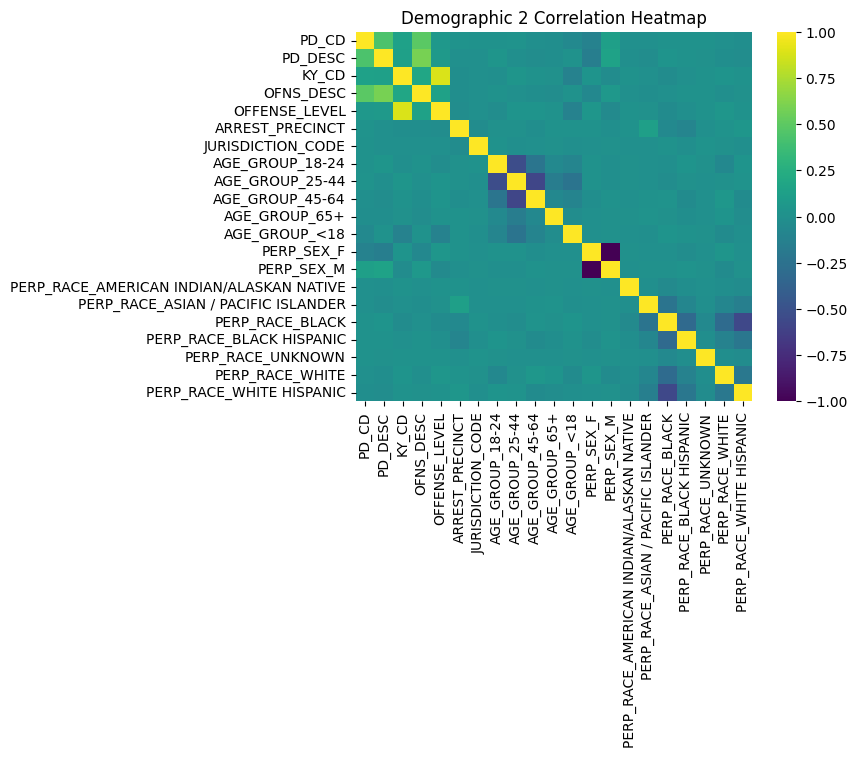

In [301]:
sns.heatmap(df_demo_heat.corr(), annot=False, cmap='viridis')
plt.title('Demographic 2 Correlation Heatmap')

# <b>MODELING

## <b> MAIN DATASET

In [302]:
df

,PD_CD,PD_DESC,KY_CD,OFNS_DESC,OFFENSE_LEVEL,ARREST_PRECINCT,JURISDICTION_CODE,Latitude,Longitude,MONTH,FALL,SPRING,SUMMER,WINTER,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN_ISLAND
0,105,206,106,17,0,105,0,40.737043,-73.735514,1,False,False,False,True,False,False,False,True,False
1,263,16,114,4,0,107,71,40.732881,-73.807899,2,False,False,False,True,False,False,False,True,False
2,109,17,106,17,0,48,0,40.855109,-73.892818,3,False,True,False,False,True,False,False,False,False
3,109,17,106,17,0,121,0,40.628967,-74.163275,5,False,True,False,False,False,False,False,False,True
4,105,206,106,17,0,100,0,40.591980,-73.800066,6,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195442,339,124,341,47,1,109,0,40.757691,-73.834115,9,True,False,False,False,False,False,False,True,False
195443,101,18,344,5,1,34,0,40.856808,-73.928265,9,True,False,False,False,False,False,True,False,False
195444,244,29,107,7,0,23,0,40.786116,-73.942614,9,True,False,False,False,False,False,True,False,False
195445,478,211,343,43,1,44,1,40.827812,-73.925929,9,True,False,False,False,True,False,False,False,False


In [303]:
df.dtypes

PD_CD                category
PD_DESC                 int64
KY_CD                category
OFNS_DESC               int64
OFFENSE_LEVEL           int64
ARREST_PRECINCT         int64
JURISDICTION_CODE       int64
Latitude              float64
Longitude             float64
MONTH                category
FALL                     bool
SPRING                   bool
SUMMER                   bool
WINTER                   bool
BRONX                    bool
BROOKLYN                 bool
MANHATTAN                bool
QUEENS                   bool
STATEN_ISLAND            bool
dtype: object

In [304]:
df.corr()

,PD_CD,PD_DESC,KY_CD,OFNS_DESC,OFFENSE_LEVEL,ARREST_PRECINCT,JURISDICTION_CODE,Latitude,Longitude,MONTH,FALL,SPRING,SUMMER,WINTER,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN_ISLAND
PD_CD,1.000000,0.436869,0.135129,0.489381,0.063502,0.025078,0.016965,-0.024564,-0.003769,-0.024575,-0.006041,-0.001793,-0.017910,0.027325,-0.022669,0.033483,-0.020137,-0.010442,0.036208
PD_DESC,0.436869,1.000000,0.126219,0.589284,0.071438,-0.004114,-0.000438,-0.010594,-0.008547,-0.003346,0.003556,-0.007483,-0.003937,0.010427,0.004149,0.032287,-0.012876,-0.033386,0.015164
KY_CD,0.135129,0.126219,1.000000,0.185502,0.886216,-0.017573,-0.000975,-0.002356,-0.005792,-0.013473,-0.002649,0.000935,-0.011185,0.013867,0.009839,-0.006831,0.010372,-0.019628,0.013134
OFNS_DESC,0.489381,0.589284,0.185502,1.000000,0.148063,-0.015870,-0.004567,-0.002616,-0.009227,-0.010202,-0.001457,-0.002434,-0.007814,0.012920,-0.002939,-0.012125,0.017694,-0.007858,0.011836
OFFENSE_LEVEL,0.063502,0.071438,0.886216,0.148063,1.000000,-0.023586,-0.003931,-0.000160,-0.005956,-0.007853,-0.000677,0.000699,-0.006727,0.007492,0.003970,-0.019772,0.024067,-0.011674,0.008928
ARREST_PRECINCT,0.025078,-0.004114,-0.017573,-0.015870,-0.023586,1.000000,-0.033059,-0.242879,0.084188,0.003745,-0.003404,-0.004752,0.009297,-0.002750,-0.287425,0.175098,-0.725035,0.674524,0.347730
JURISDICTION_CODE,0.016965,-0.000438,-0.000975,-0.004567,-0.003931,-0.033059,1.000000,0.016543,0.005989,-0.003598,-0.000914,0.005795,-0.005197,0.000075,0.035856,-0.035650,0.017290,-0.007602,-0.015834
Latitude,-0.024564,-0.010594,-0.002356,-0.002616,-0.000160,-0.242879,0.016543,1.000000,-0.764876,0.006203,0.004703,-0.000904,0.002352,-0.005236,0.370793,-0.316247,0.117607,-0.068924,-0.171199
Longitude,-0.003769,-0.008547,-0.005792,-0.009227,-0.005956,0.084188,0.005989,-0.764876,1.000000,0.000287,0.000960,-0.005856,0.001243,0.004534,0.067154,-0.062223,-0.104485,0.188149,-0.165976
MONTH,-0.024575,-0.003346,-0.013473,-0.010202,-0.007853,0.003745,-0.003598,0.006203,0.000287,1.000000,0.534929,-0.281335,0.556122,-0.725246,0.004580,0.001060,-0.007421,0.006778,-0.010073


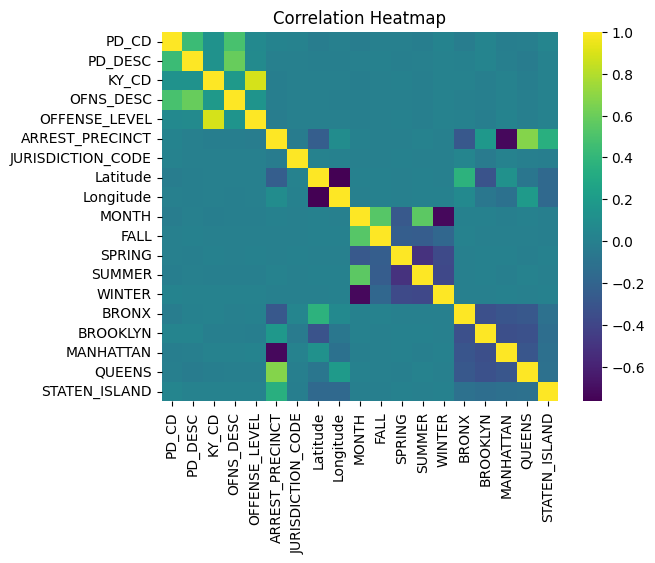

In [305]:
# create a heatmap
sns.heatmap(df.corr(), annot=False, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

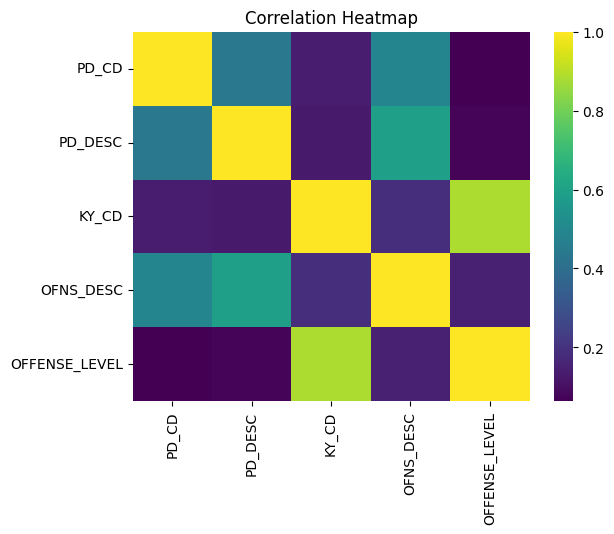

In [306]:
# make a heatmap with just PD_CD, PD_DESC, KY_CD, OFNS_DESC, OFFENSE_LEVEL 
df_heat = df[['PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC', 'OFFENSE_LEVEL']]

sns.heatmap(df_heat.corr(), annot=False, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()


In [307]:
df_no_codes = df.copy()
df_no_desc = df.copy()

In [308]:
df

,PD_CD,PD_DESC,KY_CD,OFNS_DESC,OFFENSE_LEVEL,ARREST_PRECINCT,JURISDICTION_CODE,Latitude,Longitude,MONTH,FALL,SPRING,SUMMER,WINTER,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN_ISLAND
0,105,206,106,17,0,105,0,40.737043,-73.735514,1,False,False,False,True,False,False,False,True,False
1,263,16,114,4,0,107,71,40.732881,-73.807899,2,False,False,False,True,False,False,False,True,False
2,109,17,106,17,0,48,0,40.855109,-73.892818,3,False,True,False,False,True,False,False,False,False
3,109,17,106,17,0,121,0,40.628967,-74.163275,5,False,True,False,False,False,False,False,False,True
4,105,206,106,17,0,100,0,40.591980,-73.800066,6,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195442,339,124,341,47,1,109,0,40.757691,-73.834115,9,True,False,False,False,False,False,False,True,False
195443,101,18,344,5,1,34,0,40.856808,-73.928265,9,True,False,False,False,False,False,True,False,False
195444,244,29,107,7,0,23,0,40.786116,-73.942614,9,True,False,False,False,False,False,True,False,False
195445,478,211,343,43,1,44,1,40.827812,-73.925929,9,True,False,False,False,True,False,False,False,False


## <b> DF_no_codes

In [309]:
df_no_codes.drop(columns=['KY_CD', 'PD_CD'], inplace=True)

In [310]:
df_no_codes

,PD_DESC,OFNS_DESC,OFFENSE_LEVEL,ARREST_PRECINCT,JURISDICTION_CODE,Latitude,Longitude,MONTH,FALL,SPRING,SUMMER,WINTER,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN_ISLAND
0,206,17,0,105,0,40.737043,-73.735514,1,False,False,False,True,False,False,False,True,False
1,16,4,0,107,71,40.732881,-73.807899,2,False,False,False,True,False,False,False,True,False
2,17,17,0,48,0,40.855109,-73.892818,3,False,True,False,False,True,False,False,False,False
3,17,17,0,121,0,40.628967,-74.163275,5,False,True,False,False,False,False,False,False,True
4,206,17,0,100,0,40.591980,-73.800066,6,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195442,124,47,1,109,0,40.757691,-73.834115,9,True,False,False,False,False,False,False,True,False
195443,18,5,1,34,0,40.856808,-73.928265,9,True,False,False,False,False,False,True,False,False
195444,29,7,0,23,0,40.786116,-73.942614,9,True,False,False,False,False,False,True,False,False
195445,211,43,1,44,1,40.827812,-73.925929,9,True,False,False,False,True,False,False,False,False


## <b> DF_no_desc

In [311]:
df_no_desc.drop(columns=['OFNS_DESC', 'PD_DESC'], inplace=True)

In [312]:
df_no_desc

,PD_CD,KY_CD,OFFENSE_LEVEL,ARREST_PRECINCT,JURISDICTION_CODE,Latitude,Longitude,MONTH,FALL,SPRING,SUMMER,WINTER,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN_ISLAND
0,105,106,0,105,0,40.737043,-73.735514,1,False,False,False,True,False,False,False,True,False
1,263,114,0,107,71,40.732881,-73.807899,2,False,False,False,True,False,False,False,True,False
2,109,106,0,48,0,40.855109,-73.892818,3,False,True,False,False,True,False,False,False,False
3,109,106,0,121,0,40.628967,-74.163275,5,False,True,False,False,False,False,False,False,True
4,105,106,0,100,0,40.591980,-73.800066,6,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195442,339,341,1,109,0,40.757691,-73.834115,9,True,False,False,False,False,False,False,True,False
195443,101,344,1,34,0,40.856808,-73.928265,9,True,False,False,False,False,False,True,False,False
195444,244,107,0,23,0,40.786116,-73.942614,9,True,False,False,False,False,False,True,False,False
195445,478,343,1,44,1,40.827812,-73.925929,9,True,False,False,False,True,False,False,False,False


## <b> DF_no_pd

In [313]:
df_no_pd= df_no_desc.copy()

In [314]:
df_no_pd.drop(columns=['PD_CD'], inplace=True)

In [315]:
df_no_pd

,KY_CD,OFFENSE_LEVEL,ARREST_PRECINCT,JURISDICTION_CODE,Latitude,Longitude,MONTH,FALL,SPRING,SUMMER,WINTER,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN_ISLAND
0,106,0,105,0,40.737043,-73.735514,1,False,False,False,True,False,False,False,True,False
1,114,0,107,71,40.732881,-73.807899,2,False,False,False,True,False,False,False,True,False
2,106,0,48,0,40.855109,-73.892818,3,False,True,False,False,True,False,False,False,False
3,106,0,121,0,40.628967,-74.163275,5,False,True,False,False,False,False,False,False,True
4,106,0,100,0,40.591980,-73.800066,6,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195442,341,1,109,0,40.757691,-73.834115,9,True,False,False,False,False,False,False,True,False
195443,344,1,34,0,40.856808,-73.928265,9,True,False,False,False,False,False,True,False,False
195444,107,0,23,0,40.786116,-73.942614,9,True,False,False,False,False,False,True,False,False
195445,343,1,44,1,40.827812,-73.925929,9,True,False,False,False,True,False,False,False,False


## <b> DF_KY_DESC

In [316]:
df_KY_DESC = df.copy()
df_KY_DESC.drop(columns=['PD_CD', 'PD_DESC'], inplace=True)

In [317]:
df_KY_DESC

,KY_CD,OFNS_DESC,OFFENSE_LEVEL,ARREST_PRECINCT,JURISDICTION_CODE,Latitude,Longitude,MONTH,FALL,SPRING,SUMMER,WINTER,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN_ISLAND
0,106,17,0,105,0,40.737043,-73.735514,1,False,False,False,True,False,False,False,True,False
1,114,4,0,107,71,40.732881,-73.807899,2,False,False,False,True,False,False,False,True,False
2,106,17,0,48,0,40.855109,-73.892818,3,False,True,False,False,True,False,False,False,False
3,106,17,0,121,0,40.628967,-74.163275,5,False,True,False,False,False,False,False,False,True
4,106,17,0,100,0,40.591980,-73.800066,6,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195442,341,47,1,109,0,40.757691,-73.834115,9,True,False,False,False,False,False,False,True,False
195443,344,5,1,34,0,40.856808,-73.928265,9,True,False,False,False,False,False,True,False,False
195444,107,7,0,23,0,40.786116,-73.942614,9,True,False,False,False,False,False,True,False,False
195445,343,43,1,44,1,40.827812,-73.925929,9,True,False,False,False,True,False,False,False,False


# <b> No KY

In [318]:
# no KY_CD
df_no_ky = df.copy()
df_no_ky.drop(columns=['KY_CD'], inplace=True)

In [319]:
df_no_ky

,PD_CD,PD_DESC,OFNS_DESC,OFFENSE_LEVEL,ARREST_PRECINCT,JURISDICTION_CODE,Latitude,Longitude,MONTH,FALL,SPRING,SUMMER,WINTER,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN_ISLAND
0,105,206,17,0,105,0,40.737043,-73.735514,1,False,False,False,True,False,False,False,True,False
1,263,16,4,0,107,71,40.732881,-73.807899,2,False,False,False,True,False,False,False,True,False
2,109,17,17,0,48,0,40.855109,-73.892818,3,False,True,False,False,True,False,False,False,False
3,109,17,17,0,121,0,40.628967,-74.163275,5,False,True,False,False,False,False,False,False,True
4,105,206,17,0,100,0,40.591980,-73.800066,6,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195442,339,124,47,1,109,0,40.757691,-73.834115,9,True,False,False,False,False,False,False,True,False
195443,101,18,5,1,34,0,40.856808,-73.928265,9,True,False,False,False,False,False,True,False,False
195444,244,29,7,0,23,0,40.786116,-73.942614,9,True,False,False,False,False,False,True,False,False
195445,478,211,43,1,44,1,40.827812,-73.925929,9,True,False,False,False,True,False,False,False,False


## <b> Training

In [320]:
# we're going to run all 3 datasets through the KNN model and compare their preformance
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# split for df_no_codes
X = df_no_codes.drop(columns=['OFFENSE_LEVEL'])
y = df_no_codes['OFFENSE_LEVEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# split for df_no_desc
X1 = df_no_desc.drop(columns=['OFFENSE_LEVEL'])
y1 = df_no_desc['OFFENSE_LEVEL']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# split for df_no_pd
X2 = df_no_pd.drop(columns=['OFFENSE_LEVEL'])
y2 = df_no_pd['OFFENSE_LEVEL']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# split for df_only_kd
X3 = df_KY_DESC.drop(columns=['OFFENSE_LEVEL'])
y3 = df_KY_DESC['OFFENSE_LEVEL']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

# split for df_no_kd
X4 = df_no_ky.drop(columns=['OFFENSE_LEVEL'])
y4 = df_no_ky['OFFENSE_LEVEL']

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42)

#KNN for df_no_codes
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

#KNN for df_no_desc
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train1, y_train1)
y_pred1 = knn1.predict(X_test1)
accuracy_score(y_test1, y_pred1)

#KNN for df_no_pd
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train2, y_train2)
y_pred2 = knn2.predict(X_test2)
accuracy_score(y_test2, y_pred2)

#KNN for df_only_kd
knn3 = KNeighborsClassifier(n_neighbors=5)
knn3.fit(X_train3, y_train3)
y_pred3 = knn3.predict(X_test3)
accuracy_score(y_test3, y_pred3)

#KNN for df_no_kd
knn4 = KNeighborsClassifier(n_neighbors=5)
knn4.fit(X_train4, y_train4)
y_pred4 = knn4.predict(X_test4)
accuracy_score(y_test4, y_pred4)

# print the 5 accuracies
print("No Codes:", accuracy_score(y_test, y_pred)) # no codes
print("No Descriptions:", accuracy_score(y_test1, y_pred1)) # no descriptions
print("No PD CD/DESC:", accuracy_score(y_test2, y_pred2)) # Only KY_CD
print("No KY_CD:", accuracy_score(y_test4, y_pred4)) # no KY_CD
print("KY_CD + OFNS_DESC:", accuracy_score(y_test3, y_pred3)) # KY_CD + OFNS_DESC

No Codes: 0.9756727441764371
No Descriptions: 0.9972367129797015
No PD CD/DESC: 0.99728836320438
No KY_CD: 0.9918909147254791
KY_CD + OFNS_DESC: 0.9974174887660762


In [321]:
df_model = df_KY_DESC

In [322]:
# convert the label encoded columns back to categorical for OFNS_DESC in df_only_kd

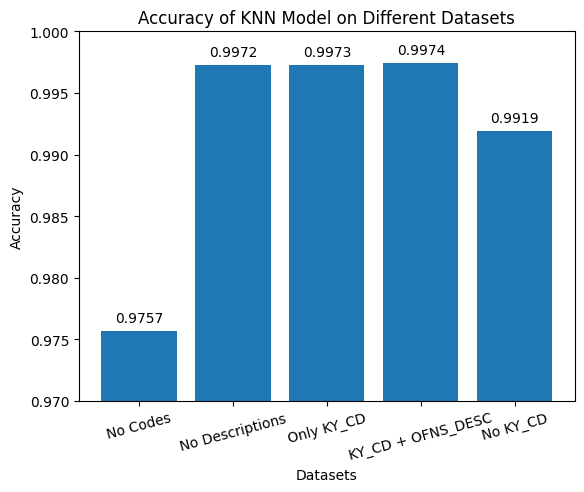

In [323]:
# Calculate accuracies
accuracies = [
    accuracy_score(y_test, y_pred),
    accuracy_score(y_test1, y_pred1),
    accuracy_score(y_test2, y_pred2),
    accuracy_score(y_test3, y_pred3),
    accuracy_score(y_test4, y_pred4)
]
datasets = ['No Codes', 'No Descriptions', 'Only KY_CD', 'KY_CD + OFNS_DESC', 'No KY_CD']

# Create bar plot
plt.bar(datasets, accuracies)
plt.title('Accuracy of KNN Model on Different Datasets')

# Scale the y-axis to look closer at the differences
plt.ylim(0.97, 1)
plt.ylabel('Accuracy')
plt.xticks(rotation=15)
plt.xlabel('Datasets')

# Add the value at the top of each bar
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.0005, f'{v:.4f}', ha='center', va='bottom')

plt.show()

In [324]:
# run df_demo through KNN model
X_demo = df_demo.drop(columns=['OFFENSE_LEVEL'])
y_demo = df_demo['OFFENSE_LEVEL']

X_train_demo, X_test_demo, y_train_demo, y_test_demo = train_test_split(X_demo, y_demo, test_size=0.2, random_state=42)

knn_demo = KNeighborsClassifier(n_neighbors=5)
knn_demo.fit(X_train_demo, y_train_demo)
y_pred_demo = knn_demo.predict(X_test_demo)
accuracy_score(y_test_demo, y_pred_demo)

print("Demographics:", accuracy_score(y_test_demo, y_pred_demo))

Demographics: 0.9972367129797015


In [325]:
df_demo.columns

Index(['PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC', 'OFFENSE_LEVEL',
       'ARREST_PRECINCT', 'JURISDICTION_CODE', 'Latitude', 'Longitude',
       'MONTH', 'FALL', 'SPRING', 'SUMMER', 'WINTER', 'BRONX', 'BROOKLYN',
       'MANHATTAN', 'QUEENS', 'STATEN_ISLAND', 'AGE_GROUP_18-24',
       'AGE_GROUP_25-44', 'AGE_GROUP_45-64', 'AGE_GROUP_65+', 'AGE_GROUP_<18',
       'PERP_SEX_F', 'PERP_SEX_M', 'PERP_RACE_AMERICAN INDIAN/ALASKAN NATIVE',
       'PERP_RACE_ASIAN / PACIFIC ISLANDER', 'PERP_RACE_BLACK',
       'PERP_RACE_BLACK HISPANIC', 'PERP_RACE_UNKNOWN', 'PERP_RACE_WHITE',
       'PERP_RACE_WHITE HISPANIC'],
      dtype='object')

In [333]:
df_demo_filter = df_demo.copy()
df_demo_filter = df_demo_filter.drop(columns=['PD_CD', 'PD_DESC'])

In [334]:
df_demo_filter

,KY_CD,OFNS_DESC,OFFENSE_LEVEL,ARREST_PRECINCT,JURISDICTION_CODE,Latitude,Longitude,MONTH,FALL,SPRING,...,AGE_GROUP_<18,PERP_SEX_F,PERP_SEX_M,PERP_RACE_AMERICAN INDIAN/ALASKAN NATIVE,PERP_RACE_ASIAN / PACIFIC ISLANDER,PERP_RACE_BLACK,PERP_RACE_BLACK HISPANIC,PERP_RACE_UNKNOWN,PERP_RACE_WHITE,PERP_RACE_WHITE HISPANIC
0,106,17,0,105,0,40.737043,-73.735514,1,False,False,...,False,False,True,False,False,False,False,False,True,False
1,114,4,0,107,71,40.732881,-73.807899,2,False,False,...,False,False,True,False,False,False,False,False,True,False
2,106,17,0,48,0,40.855109,-73.892818,3,False,True,...,False,False,True,False,False,True,False,False,False,False
3,106,17,0,121,0,40.628967,-74.163275,5,False,True,...,False,False,True,False,False,False,False,False,True,False
4,106,17,0,100,0,40.591980,-73.800066,6,False,False,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195442,341,47,1,109,0,40.757691,-73.834115,9,True,False,...,False,False,True,False,False,False,False,False,False,True
195443,344,5,1,34,0,40.856808,-73.928265,9,True,False,...,False,False,True,False,False,False,False,False,False,True
195444,107,7,0,23,0,40.786116,-73.942614,9,True,False,...,False,False,True,False,False,False,False,False,True,False
195445,343,43,1,44,1,40.827812,-73.925929,9,True,False,...,False,False,True,False,False,True,False,False,False,False


In [340]:
df_demo_filter2 = df_demo_filter.copy()
#df_demo_filter2

In [341]:
df_demo_filter2 = df_demo_filter2.drop(columns=['BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN_ISLAND','FALL', 'SPRING', 'SUMMER', 'WINTER'])

In [342]:
df_demo_filter2

,KY_CD,OFNS_DESC,OFFENSE_LEVEL,ARREST_PRECINCT,JURISDICTION_CODE,Latitude,Longitude,MONTH,BRONX,AGE_GROUP_18-24,...,AGE_GROUP_<18,PERP_SEX_F,PERP_SEX_M,PERP_RACE_AMERICAN INDIAN/ALASKAN NATIVE,PERP_RACE_ASIAN / PACIFIC ISLANDER,PERP_RACE_BLACK,PERP_RACE_BLACK HISPANIC,PERP_RACE_UNKNOWN,PERP_RACE_WHITE,PERP_RACE_WHITE HISPANIC
0,106,17,0,105,0,40.737043,-73.735514,1,False,False,...,False,False,True,False,False,False,False,False,True,False
1,114,4,0,107,71,40.732881,-73.807899,2,False,False,...,False,False,True,False,False,False,False,False,True,False
2,106,17,0,48,0,40.855109,-73.892818,3,True,False,...,False,False,True,False,False,True,False,False,False,False
3,106,17,0,121,0,40.628967,-74.163275,5,False,False,...,False,False,True,False,False,False,False,False,True,False
4,106,17,0,100,0,40.591980,-73.800066,6,False,False,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195442,341,47,1,109,0,40.757691,-73.834115,9,False,True,...,False,False,True,False,False,False,False,False,False,True
195443,344,5,1,34,0,40.856808,-73.928265,9,False,False,...,False,False,True,False,False,False,False,False,False,True
195444,107,7,0,23,0,40.786116,-73.942614,9,False,False,...,False,False,True,False,False,False,False,False,True,False
195445,343,43,1,44,1,40.827812,-73.925929,9,True,False,...,False,False,True,False,False,True,False,False,False,False


In [329]:
# run df_demo_filter through KNN model
X_demo_filter = df_demo.drop(columns=['OFFENSE_LEVEL'])
y_demo_filter = df_demo['OFFENSE_LEVEL']

X_train_demo_filter, X_test_demo_filter, y_train_demo_filter, y_test_demo_filter = train_test_split(X_demo_filter, y_demo_filter, test_size=0.2, random_state=42)

knn_demo_filter = KNeighborsClassifier(n_neighbors=5)
knn_demo_filter.fit(X_train_demo_filter, y_train_demo_filter)
y_pred_demo_filter = knn_demo_filter.predict(X_test_demo_filter)
accuracy_score(y_test_demo_filter, y_pred_demo_filter)

print("Demographics Filtered:", accuracy_score(y_test_demo_filter, y_pred_demo_filter))
# Demographics Filtered: 0.9972367129797015


Demographics Filtered: 0.9972367129797015


In [343]:
# run df_demo_filter2 through KNN model
X_demo_filter2 = df_demo_filter2.drop(columns=['OFFENSE_LEVEL'])
y_demo_filter2 = df_demo_filter2['OFFENSE_LEVEL']

X_train_demo_filter2, X_test_demo_filter2, y_train_demo_filter2, y_test_demo_filter2 = train_test_split(X_demo_filter2, y_demo_filter2, test_size=0.2, random_state=42)

knn_demo_filter2 = KNeighborsClassifier(n_neighbors=5)
knn_demo_filter2.fit(X_train_demo_filter2, y_train_demo_filter2)
y_pred_demo_filter2 = knn_demo_filter2.predict(X_test_demo_filter2)
accuracy_score(y_test_demo_filter2, y_pred_demo_filter2)

print("Demographics Filtered 2:", accuracy_score(y_test_demo_filter2, y_pred_demo_filter2))

Demographics Filtered 2: 0.9974433138784153


In [ ]:
# run df_demo_filtered through Random Forest model and plot the feature importances
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_demo_filter, y_train_demo_filter)
y_pred_rf = rf.predict(X_test_demo_filter)
accuracy_score(y_test_demo_filter, y_pred_rf)

# get the feature importances
importances = rf.feature_importances_


In [ ]:
# visualize the feature importances
plt.figure(figsize=(10,8))
plt.bar(X_train_demo_filter.columns, importances)
plt.xticks(rotation=90)
plt.title('Feature Importances')
plt.show()

In [ ]:
df_demo_filter.drop(columns=['FALL','SPRING','SUMMER','WINTER','BRONX','BROOKLYN','MANHATTAN','STATEN ISLAND'], inplace=True)

In [ ]:
df

In [ ]:
# do cross validation on df_no_codes
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(knn, X, y, cv=10)
cv_scores


In [ ]:
# prevent model overfitting
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

accuracy_score(y_test, y_pred)


In [ ]:
# run a model and find its feature importance
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_score(y_test, y_pred))

# get feature importance
feature_importances = rf.feature_importances_
feature_importances

In [ ]:
# visualize feature importance
features = X.columns
importances = feature_importances
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')

plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
for col in df_model.columns:
    print(col, ":", df_model[col].nunique(), ":", df_model[col].dtype)

In [ ]:
df_model.shape

In [ ]:
# compare the accuracy on the training and testing sets
train_accuracy = []
test_accuracy = []

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,21), train_accuracy, label='Training Accuracy', marker='o')
plt.plot(range(1,21), test_accuracy, label='Testing Accuracy', marker='o')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.title('KNN Model Accuracy')
plt.legend()
plt.show()